In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
# Correcting the path to the directory containing the file
os.chdir(r"C:\Users\User\Downloads")
# Reading the Excel file into a DataFrame
df = pd.read_excel("Student_Data.xlsx")
df
df.describe()

,StudentID,Taken,Age,CGPATier,DurationOfPitch,NumberOfFollowups,PitchSatisfactionScore,OwnCar,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4843.000000,4888.000000,4888.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,3.708445,3.078151,0.620295,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,1.002509,1.365792,0.485363,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,3.000000,2.000000,0.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,4.000000,3.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,4.000000,4.000000,1.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,6.000000,5.000000,1.000000,98678.000000


In [5]:
df.drop('StudentID', inplace = True, axis = 1)
df.head(10)

,Taken,Age,TypeofContact,CGPATier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,BootcampPitched,MaritalStatus,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Digital Marketing,Single,2,1,Manager,20993.0
1,0,49.0,University Called,1,14.0,Salaried,Male,4.0,Digital Marketing,Divorced,3,1,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Python,Single,3,0,Executive,17090.0
3,0,33.0,University Called,1,9.0,Salaried,Female,3.0,Python,Divorced,5,1,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,3.0,Python,Divorced,5,1,Executive,18468.0
5,0,32.0,University Called,1,8.0,Salaried,Male,3.0,Python,Single,5,1,Executive,18068.0
6,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2.0,Python,Divorced,2,1,Executive,17670.0
7,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3.0,Python,Married,2,0,Executive,17693.0
8,0,38.0,University Called,1,29.0,Salaried,Male,4.0,Microsoft Excel,Unmarried,3,0,Senior Manager,24526.0
9,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3.0,Digital Marketing,Divorced,3,1,Manager,20237.0


In [7]:
df.dtypes 

Taken                       int64
Age                       float64
TypeofContact              object
CGPATier                    int64
DurationOfPitch           float64
Occupation                 object
Gender                     object
NumberOfFollowups         float64
BootcampPitched            object
MaritalStatus              object
PitchSatisfactionScore      int64
OwnCar                      int64
Designation                object
MonthlyIncome             float64
dtype: object

In [9]:
# check for missing value
df.isnull().sum().to_string()
# age has 226 missing value, typeofconatct has 25 missing value, number of follow ups has 45 missing value and durationofpitch has 251 missing value
# and monthly income has 233 missing value.

'Taken                       0\nAge                       226\nTypeofContact              25\nCGPATier                    0\nDurationOfPitch           251\nOccupation                  0\nGender                      0\nNumberOfFollowups          45\nBootcampPitched             0\nMaritalStatus               0\nPitchSatisfactionScore      0\nOwnCar                      0\nDesignation                 0\nMonthlyIncome             233'

In [11]:
### Replace missing value with mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mean())
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())

# Removing rows with missing values in the 'typeofcontact' column
df = df.dropna(subset=['TypeofContact'])
df.head(10)

,Taken,Age,TypeofContact,CGPATier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,BootcampPitched,MaritalStatus,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3.0,Digital Marketing,Single,2,1,Manager,20993.0
1,0,49.000000,University Called,1,14.0,Salaried,Male,4.0,Digital Marketing,Divorced,3,1,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Python,Single,3,0,Executive,17090.0
3,0,33.000000,University Called,1,9.0,Salaried,Female,3.0,Python,Divorced,5,1,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,3.0,Python,Divorced,5,1,Executive,18468.0
5,0,32.000000,University Called,1,8.0,Salaried,Male,3.0,Python,Single,5,1,Executive,18068.0
6,0,59.000000,Self Enquiry,1,9.0,Small Business,Female,2.0,Python,Divorced,2,1,Executive,17670.0
7,0,30.000000,Self Enquiry,1,30.0,Salaried,Male,3.0,Python,Married,2,0,Executive,17693.0
8,0,38.000000,University Called,1,29.0,Salaried,Male,4.0,Microsoft Excel,Unmarried,3,0,Senior Manager,24526.0
9,0,36.000000,Self Enquiry,1,33.0,Small Business,Male,3.0,Digital Marketing,Divorced,3,1,Manager,20237.0


In [13]:
# Check all the unique value
for col in df:
    print(col, '-', df[col].unique())

Taken - [1 0]
Age - [41.         49.         37.         33.         37.62226512 32.
 59.         30.         38.         36.         35.         31.
 34.         28.         29.         22.         53.         21.
 42.         44.         46.         39.         24.         43.
 50.         27.         26.         48.         55.         45.
 56.         23.         51.         40.         54.         58.
 20.         25.         19.         57.         52.         47.
 18.         60.         61.        ]
TypeofContact - ['Self Enquiry' 'University Called']
CGPATier - [3 1 2]
DurationOfPitch - [  6.          14.           8.           9.          30.
  29.          33.          22.          21.          32.
  25.          27.          11.          17.          15.
  13.          12.          16.          10.          31.
  18.          15.49083459  24.          35.          28.
  20.          26.          34.          23.           5.
  19.         126.           7.          36.     

In [15]:
# Replace 'Fe Male' with 'Female'
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

for col in df:
    print(col, '-', df[col].unique())


Taken - [1 0]
Age - [41.         49.         37.         33.         37.62226512 32.
 59.         30.         38.         36.         35.         31.
 34.         28.         29.         22.         53.         21.
 42.         44.         46.         39.         24.         43.
 50.         27.         26.         48.         55.         45.
 56.         23.         51.         40.         54.         58.
 20.         25.         19.         57.         52.         47.
 18.         60.         61.        ]
TypeofContact - ['Self Enquiry' 'University Called']
CGPATier - [3 1 2]
DurationOfPitch - [  6.          14.           8.           9.          30.
  29.          33.          22.          21.          32.
  25.          27.          11.          17.          15.
  13.          12.          16.          10.          31.
  18.          15.49083459  24.          35.          28.
  20.          26.          34.          23.           5.
  19.         126.           7.          36.     

In [17]:
# Change all the float to int
df['Age'] = df['Age'].astype(int)
df['NumberOfFollowups'] = df['NumberOfFollowups'].astype(int)
df['DurationOfPitch'] = df['DurationOfPitch'].astype(int)
df['MonthlyIncome'] = df['MonthlyIncome'].astype(int)

# Change all the others variable from object to 0,1 
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.dtypes
df.head(10)

,Taken,Age,TypeofContact,CGPATier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,BootcampPitched,MaritalStatus,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,1,41,0,3,6,2,0,3,0,2,2,1,2,20993
1,0,49,1,1,14,2,1,4,0,0,3,1,2,20130
2,1,37,0,1,8,0,1,4,2,2,3,0,1,17090
3,0,33,1,1,9,2,0,3,2,0,5,1,1,17909
4,0,37,0,1,8,3,1,3,2,0,5,1,1,18468
5,0,32,1,1,8,2,1,3,2,2,5,1,1,18068
6,0,59,0,1,9,3,0,2,2,0,2,1,1,17670
7,0,30,0,1,30,2,1,3,2,1,2,0,1,17693
8,0,38,1,1,29,2,1,4,1,3,3,0,3,24526
9,0,36,0,1,33,3,1,3,0,0,3,1,2,20237


### Histogram

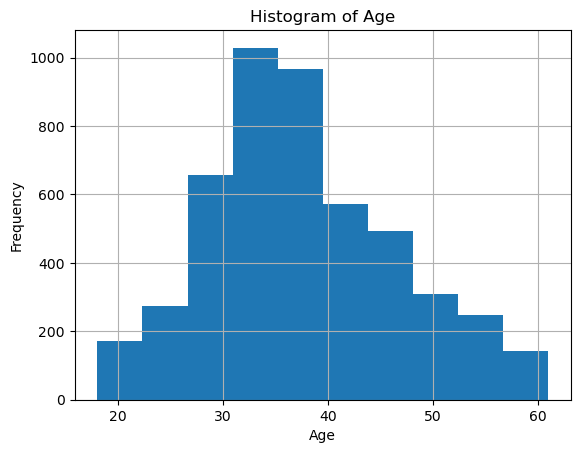

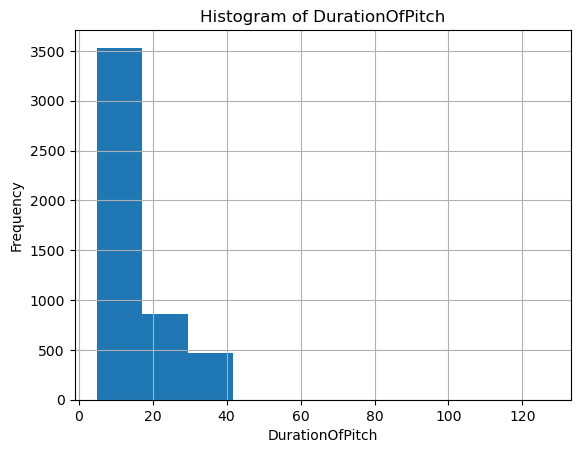

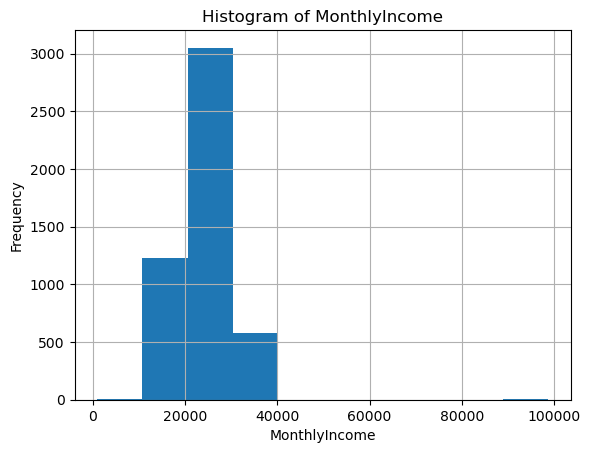

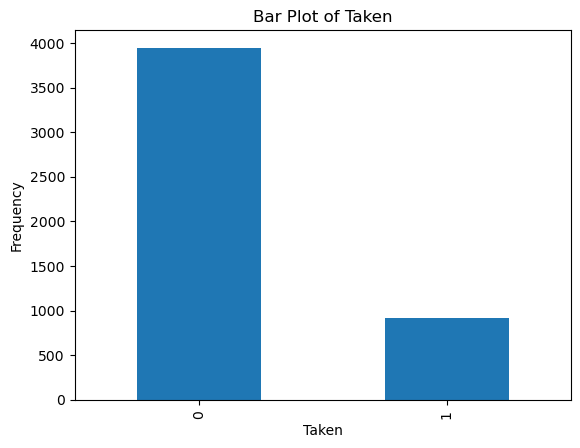

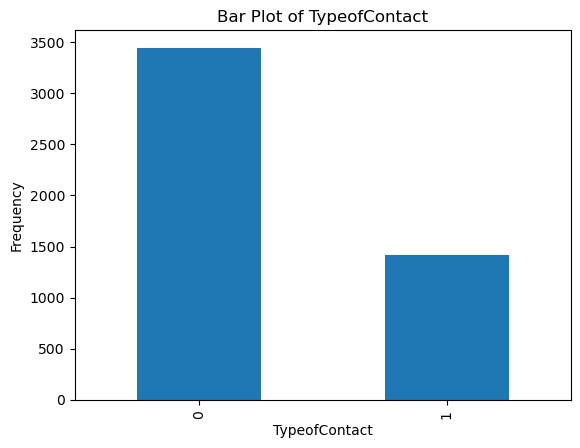

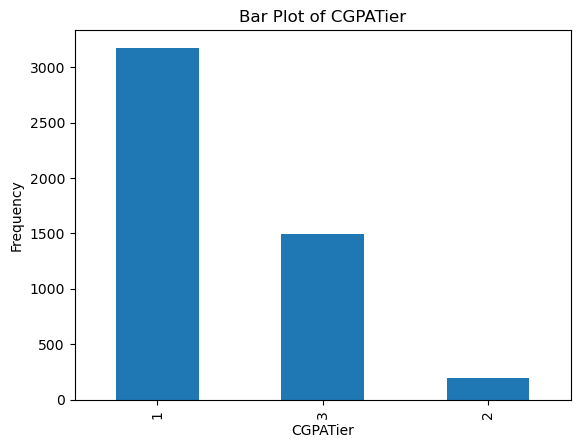

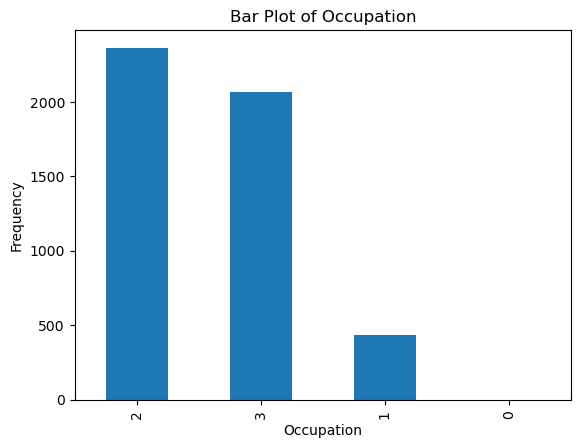

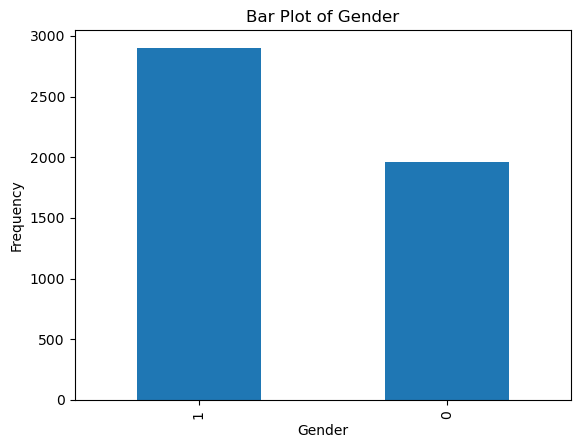

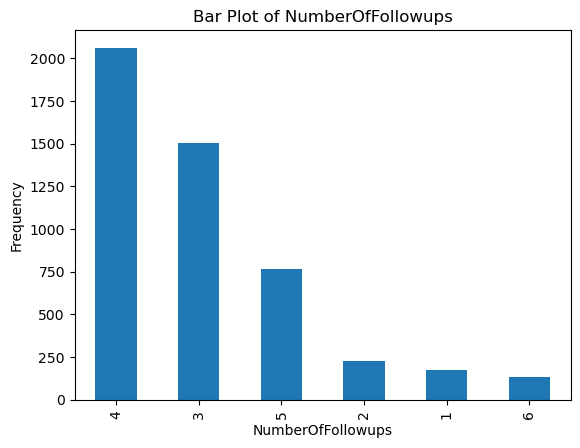

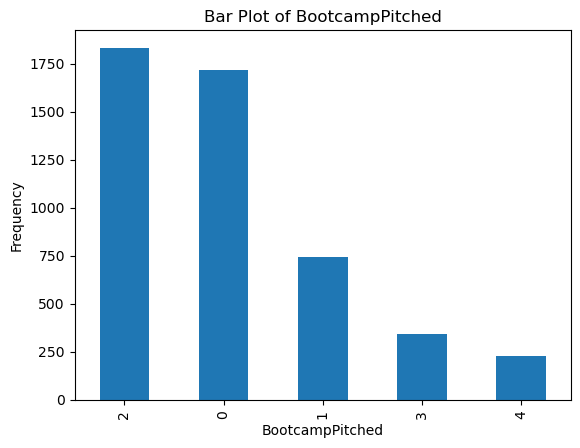

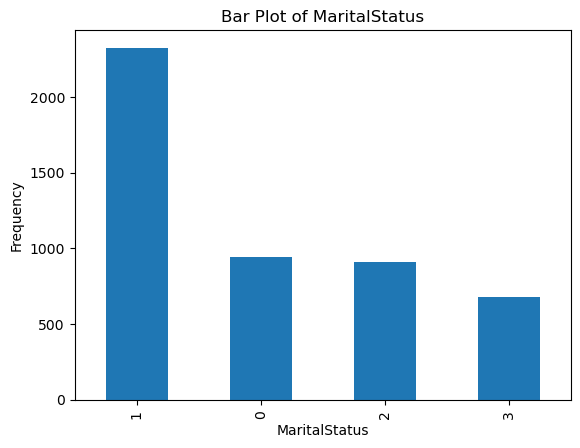

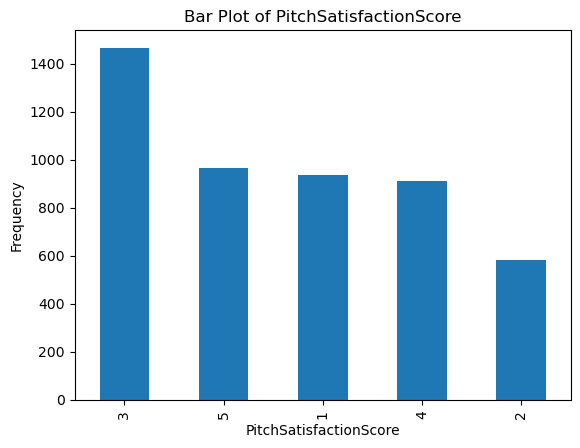

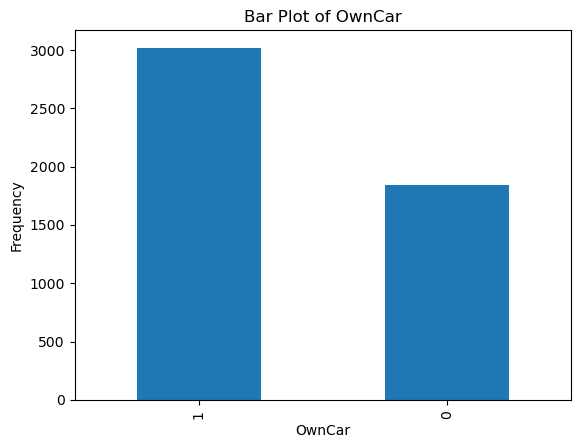

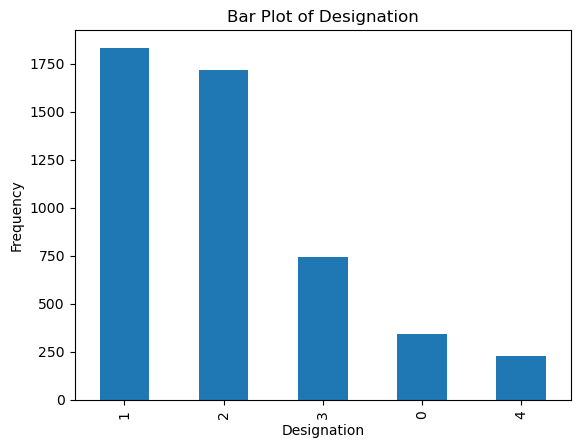

In [19]:
# Histogram after filtering outliers

hist_columns =('Age', 'DurationOfPitch', 'MonthlyIncome')

# Histogram for numeric variables
for column in hist_columns:
    plt.figure()
    df[column].hist()
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Histogram for categorical varibles
bar_columns = [col for col in df.columns if col not in hist_columns]

for column in bar_columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Outliers

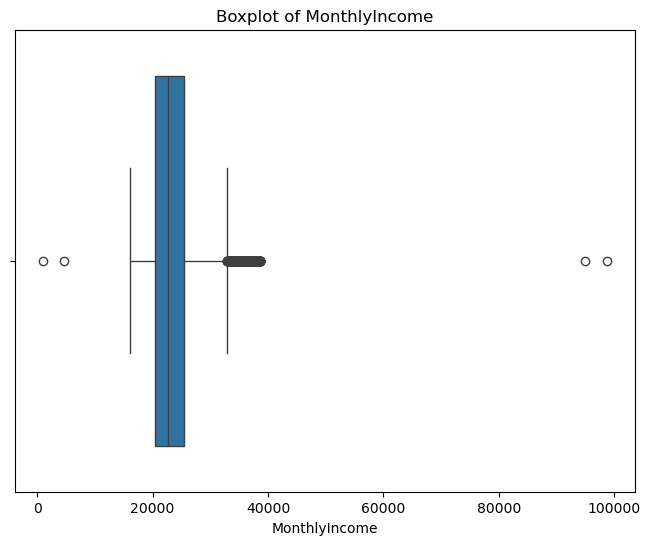

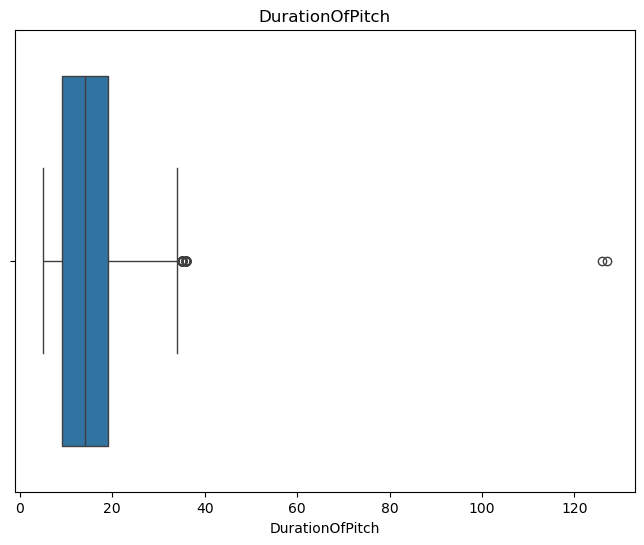

In [21]:
# Boxplot

plt.figure(figsize=(8,6))
sns.boxplot(x = df['MonthlyIncome'])
plt.title('Boxplot of MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x = df['DurationOfPitch'])
plt.title('DurationOfPitch')
plt.xlabel('DurationOfPitch')
plt.show()

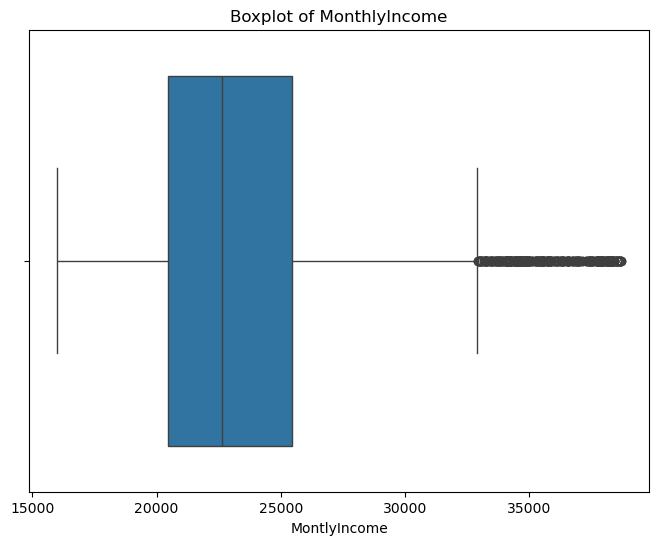

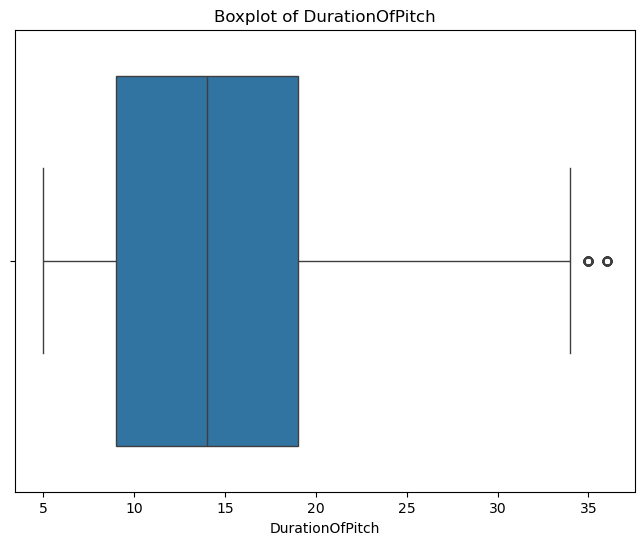

In [23]:
### Remove Outliers
# Filter the DataFrame to remove rows with DurationOfPitch > 100 or MonthlyIncome > 80000 or < 10000
df = df[(df['DurationOfPitch'] <= 100) & (df['MonthlyIncome'] <= 80000) & (df['MonthlyIncome'] >= 10000)]

#Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x= df['MonthlyIncome'])
plt.title('Boxplot of MonthlyIncome')
plt.xlabel('MontlyIncome')
plt.show()

#Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x= df['DurationOfPitch'])
plt.title('Boxplot of DurationOfPitch')
plt.xlabel('DurationOfPitch')
plt.show()

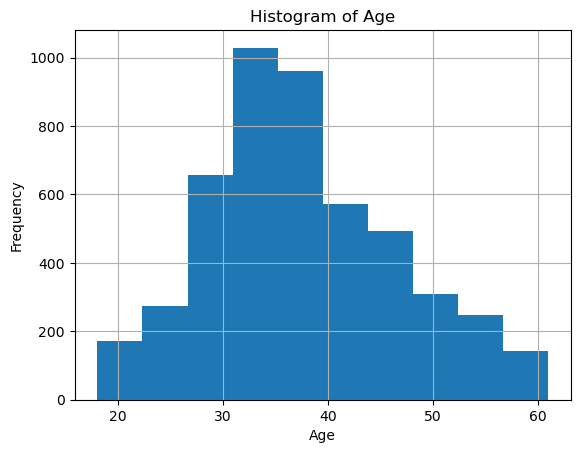

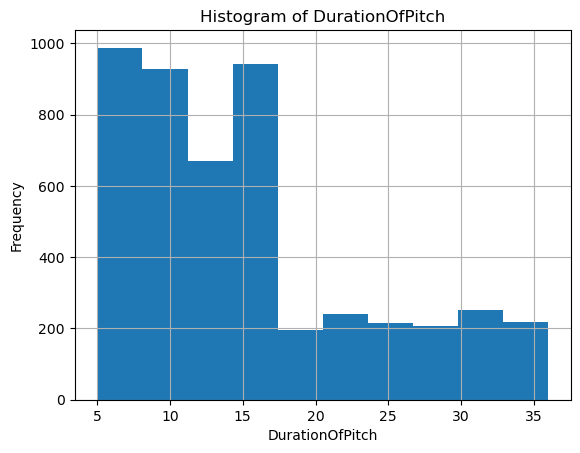

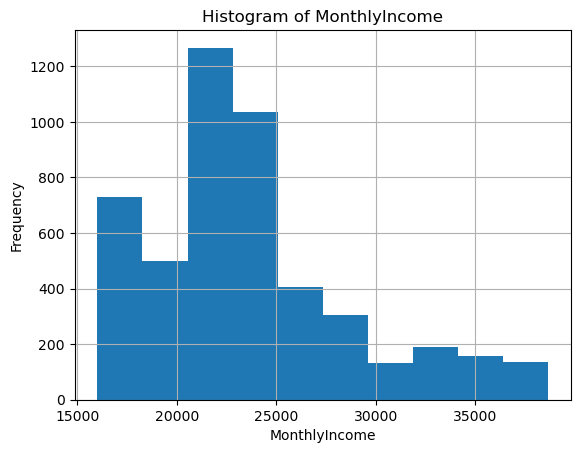

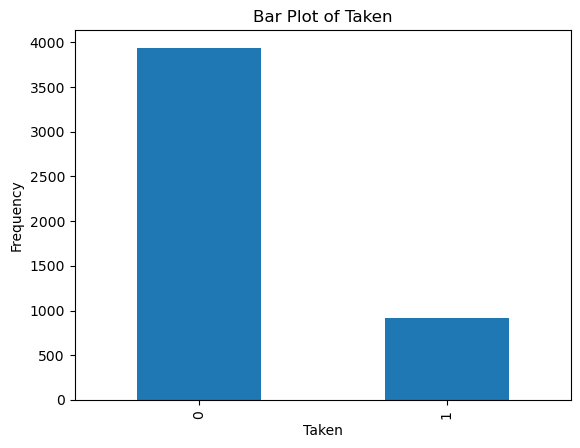

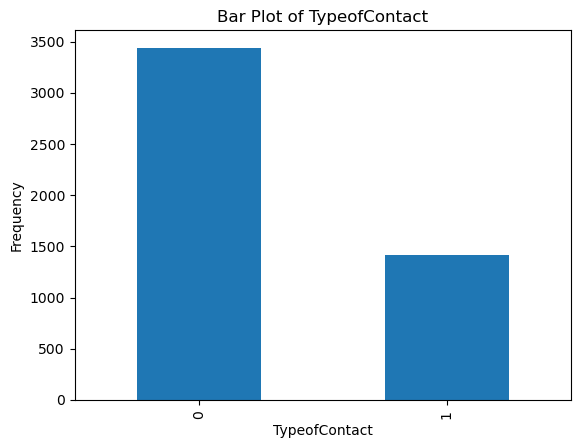

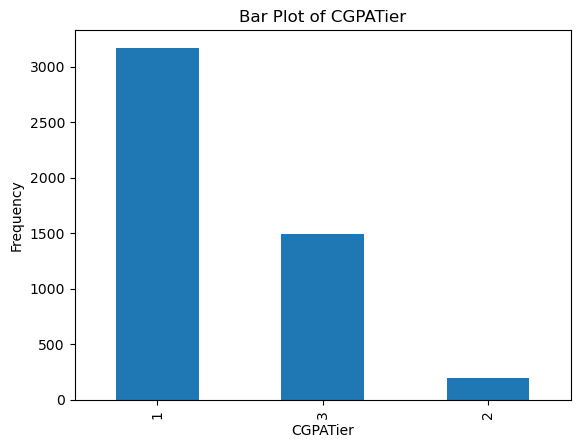

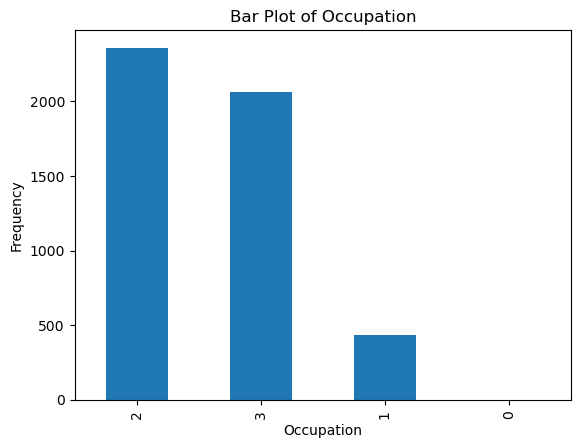

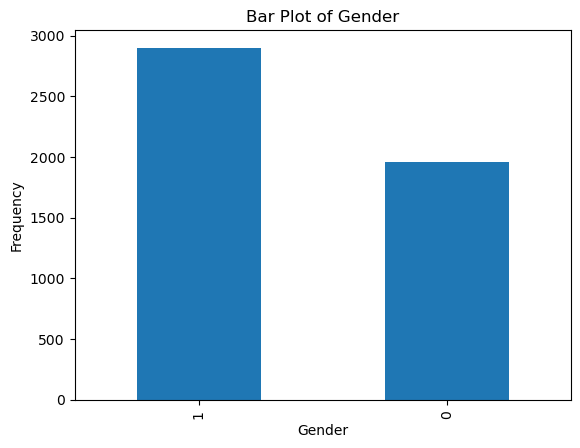

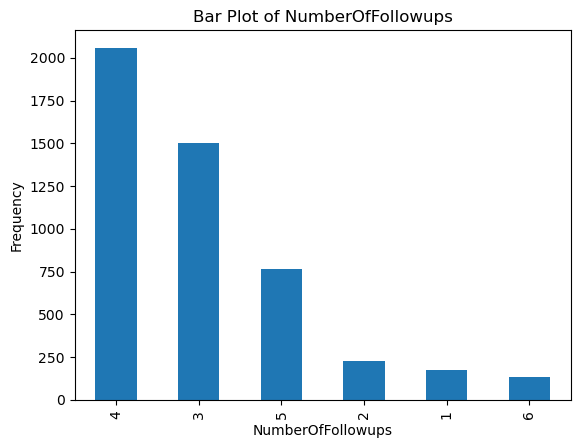

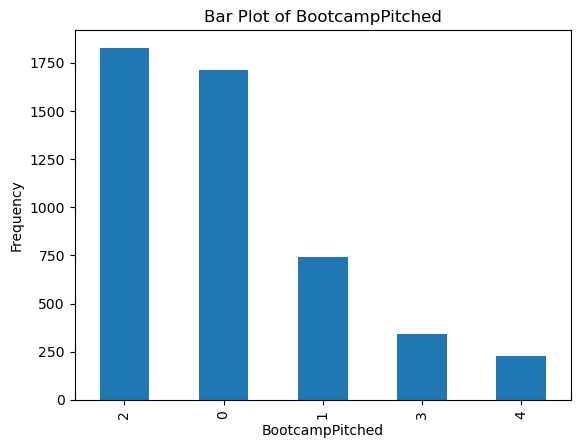

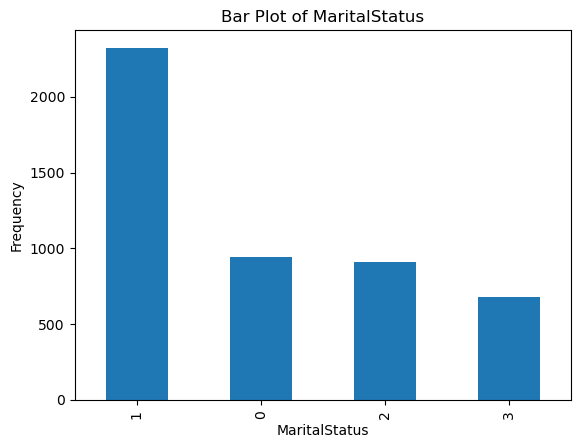

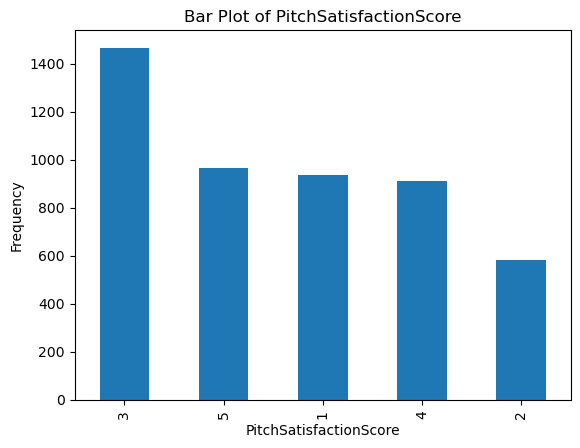

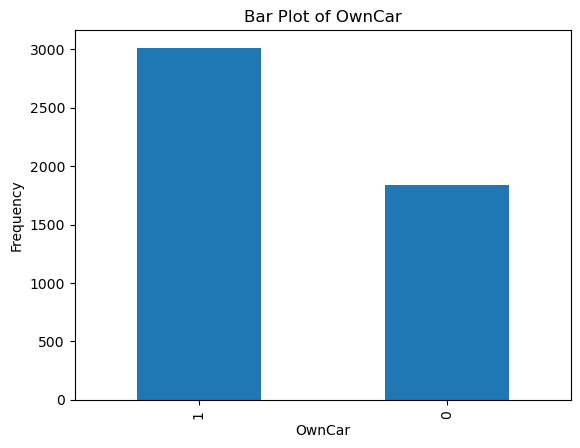

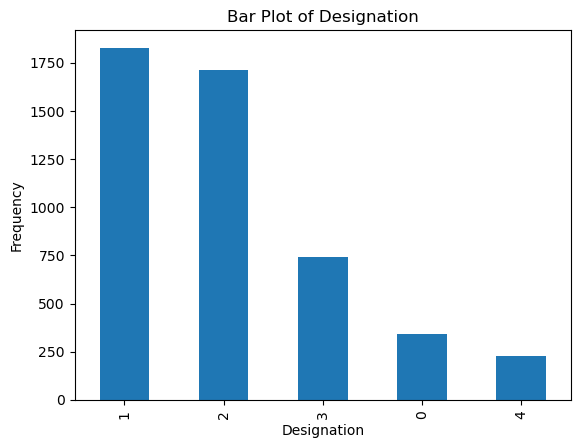

In [25]:
# Histogram after filtering outliers

hist_columns =('Age', 'DurationOfPitch', 'MonthlyIncome')

# Histogram for numeric variables
for column in hist_columns:
    plt.figure()
    df[column].hist()
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Histogram for categorical varibles
bar_columns = [col for col in df.columns if col not in hist_columns]

for column in bar_columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [27]:
#scaler = StandardScaler()
#df['Age'] = scaler.fit_transform(df[['Age']])

# Update X with the standardized Age column
#X['Age'] = df['Age']
X = df.drop('Taken', axis=1)
y = df['Taken'].values

# Normalize
columns = [col for col in X.columns if col != 'Age']
min_max = preprocessing.MinMaxScaler()
X[columns] = min_max.fit_transform(X[columns])
X.head()

,Age,TypeofContact,CGPATier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,BootcampPitched,MaritalStatus,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,41,0.0,1.0,0.032258,0.666667,0.0,0.4,0.0,0.666667,0.25,1.0,0.50,0.219869
1,49,1.0,0.0,0.290323,0.666667,1.0,0.6,0.0,0.000000,0.50,1.0,0.50,0.181798
2,37,0.0,0.0,0.096774,0.000000,1.0,0.6,0.5,0.666667,0.50,0.0,0.25,0.047688
3,33,1.0,0.0,0.129032,0.666667,0.0,0.4,0.5,0.000000,1.00,1.0,0.25,0.083819
4,37,0.0,0.0,0.096774,1.000000,1.0,0.4,0.5,0.000000,1.00,1.0,0.25,0.108479


<Axes: >

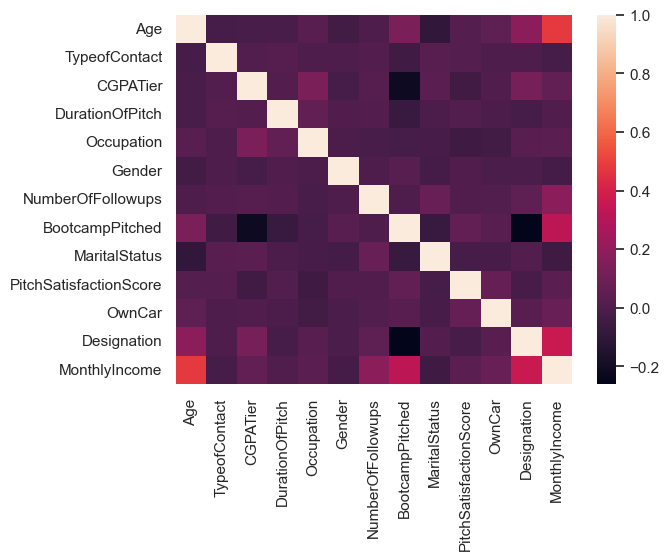

In [29]:
## Import seaborn to plot heat map
import seaborn as sns; sns.set_theme()

## Compute correlation
corr = X.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)


### Model1 (KNN)

In [31]:
## Split data into train and test set
from sklearn.model_selection import train_test_split

## Construct x_train, y_train, x_test, y_test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=True, random_state = 1)


In [33]:
## Import kNN model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [35]:
## To check accuracy
from sklearn.metrics import accuracy_score

pred_y1= knn_model.predict(test_x)
acc1 = accuracy_score(test_y, pred_y1)
print(acc1)

0.8179012345679012


In [37]:
## Use GridSearchCV to automate process of changing hyperparameter
from sklearn.model_selection import GridSearchCV

## Create a dictionary of all values we want to test for n_neighbors
knn_cv = KNeighborsClassifier()

## Use gridsearch to test all values for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

## Fit model
## cv --> 5-fold, Cross Validation
knn_gscv = GridSearchCV(knn_cv, param_grid, cv=5)
knn_gscv.fit(X, y)

# 
best_param = knn_gscv.best_params_
print(knn_gscv.best_score_)
print(best_param)

0.8536108886091721
{'n_neighbors': 1}


In [39]:
## Split data into train and test set
### New KNN with neighbors =1
from sklearn.model_selection import train_test_split

knn_model2 = KNeighborsClassifier(n_neighbors=1)
knn_model2.fit(train_x, train_y)

## To check accuracy
pred_y2 = knn_model2.predict(test_x)
acc2 = accuracy_score(test_y,pred_y2)

print(acc2)

## Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_y, pred_y2).ravel()
print(confusion_matrix(test_y, pred_y2))

0.8117283950617284
[[692  99]
 [ 84  97]]


### Model 2 Decision Tree

In [53]:
from sklearn.model_selection import train_test_split

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# define decision tree stump
from sklearn.tree import DecisionTreeClassifier 
dts= DecisionTreeClassifier(random_state=1,max_depth=3)

#fits and predict
dts= dts.fit(X_train,y_train)
y_train_pred=dts.predict(X_train)
y_test_pred=dts.predict(X_test)

#accuracy scores
from sklearn.metrics import accuracy_score, confusion_matrix

dts_train = accuracy_score(y_train, y_train_pred)
dts_test = accuracy_score(y_test,y_test_pred)
print('Decision tree stump accuracy for train/test: %.4f /  %.4f'
     % (dts_train, dts_test))

# Confusion matrix
tn,fp,fn,tp=confusion_matrix(y_test,y_test_pred).ravel()
print(confusion_matrix(y_test,y_test_pred))


Decision tree stump accuracy for train/test: 0.8170 /  0.8025
[[744  47]
 [145  36]]


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

# Create a dictionary of all values we want to test for max_depth
param_grid = {'max_depth': np.arange(1, 40)}

# Initialize the DecisionTreeClassifier
dt_cv = DecisionTreeClassifier(random_state=1)

# Use GridSearchCV to test all values for max_depth
dt_gscv = GridSearchCV(dt_cv, param_grid, cv=5)

# Fit the model
dt_gscv.fit(X, y)

# Get the best parameters and the best score
best_param = dt_gscv.best_params_
best_score = dt_gscv.best_score_

print(f"Best cross-validation accuracy: {best_score:.4f}")
print(f"Best max_depth: {best_param['max_depth']}")

Best cross-validation accuracy: 0.9174
Best max_depth: 24


In [61]:
# define decision tree stump using 24
from sklearn.tree import DecisionTreeClassifier 
dts1= DecisionTreeClassifier(random_state=1,max_depth=24)

#fits and predict
dts1= dts1.fit(X_train,y_train)
y_train_pred=dts1.predict(X_train)
y_test_pred=dts1.predict(X_test)

#accuracy scores
from sklearn.metrics import accuracy_score, confusion_matrix

dts1_train = accuracy_score(y_train, y_train_pred)
dts1_test = accuracy_score(y_test,y_test_pred)
print('Decision tree stump accuracy for train/test: %.4f /  %.4f'
     % (dts1_train, dts1_test))

# Confusion matrix
tn,fp,fn,tp=confusion_matrix(y_test,y_test_pred).ravel()
print(confusion_matrix(y_test,y_test_pred))

Decision tree stump accuracy for train/test: 1.0000 /  0.8776
[[729  62]
 [ 57 124]]


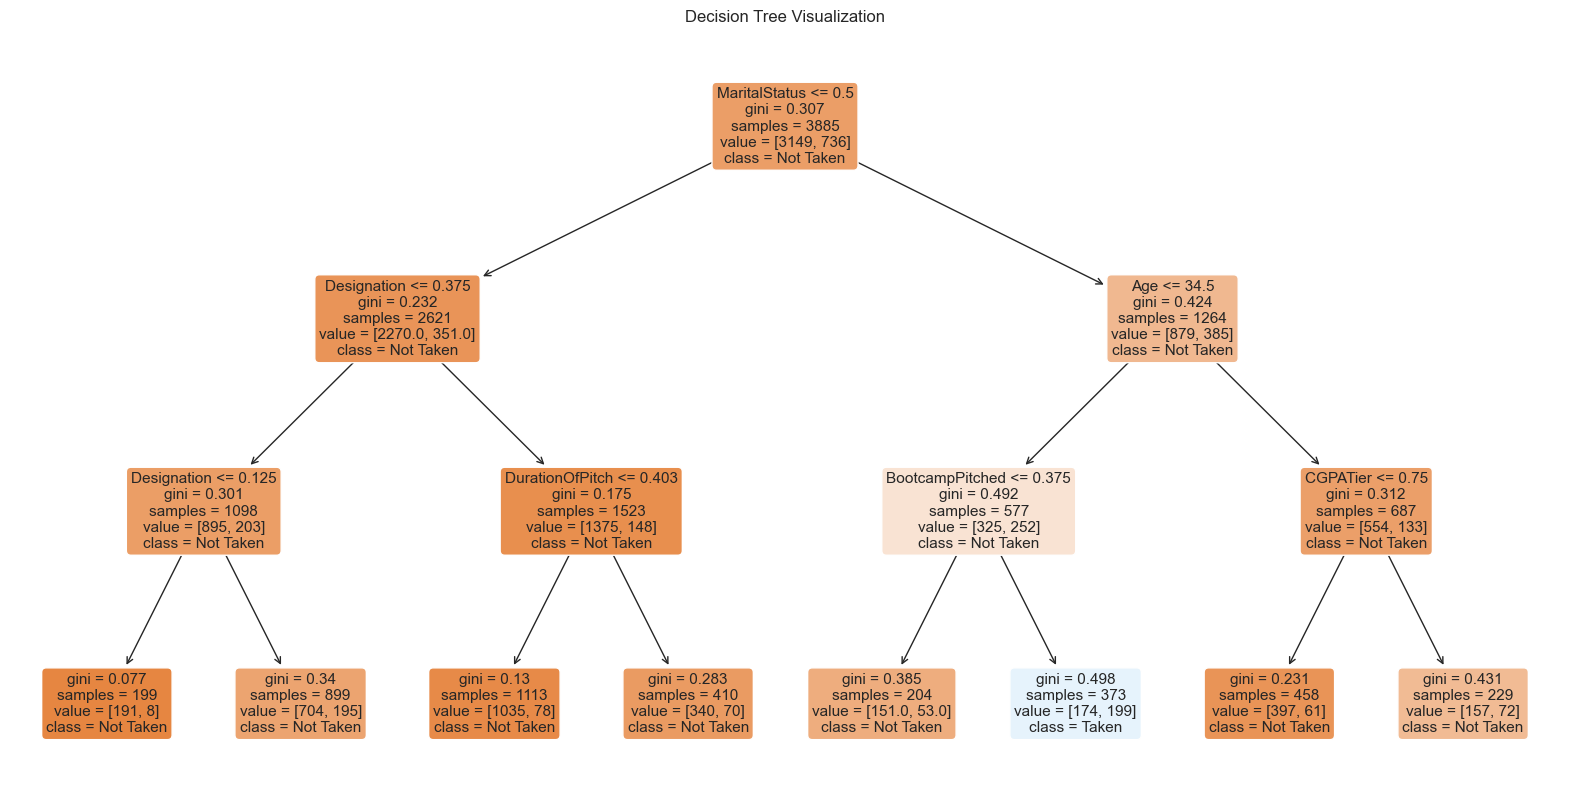

In [59]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dts, filled=True, feature_names=X.columns, class_names=['Not Taken', 'Taken'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

### Model 3(Random Forest)

In [71]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [73]:

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_features=1.0, max_depth=3, 
                          n_estimators=100, random_state=0)
RF = RF.fit(train_x, train_y)

##
y_pred = RF.predict(test_x)
acc_rf=accuracy_score(test_y,y_pred)
print(acc_rf)


from sklearn.tree import plot_tree
estimator = RF.estimators_[0]
plt.figure(figsize=(200,100))
plot_tree(estimator,feature_names=X.columns,class_names=['Not Taken', 'Taken'],filled=True,fontsize=100)
plt.title('Random Forest Visualization')
plt.show()

# Confusion matrix
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
print(confusion_matrix(y_test,y_pred))


0.8199588477366255


[[783   8]
 [167  14]]
